# PA 2: Classification - Decision Tree

Cititations:
#https://www.datacamp.com/community/tutorials/decision-tree-classification-python
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html#sklearn.tree.export_graphviz

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix , classification_report
from IPython.display import Image
from sklearn.tree import export_graphviz
#import pydot
import collections
from sklearn.externals.six import StringIO


from sklearn import tree
from sklearn.datasets import load_wine
from IPython.display import SVG
#from graphviz import Source
from IPython.display import display
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
#from pydot import graph_from_dot_data
import numpy as np
# 1) load the CSV file
data=pd.read_csv('cardio_train.csv', encoding='latin1' ,sep=';')

#print(data.iloc[[1,2,3,4,5,data.shape[0]-1]])
#data.shape

# 2) Printing the first 5 records
data.head(5)#Print the first 5 records
#print()|


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
# 2)Printing the last 5 records
data.tail(5)# Printing the last 5 records

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


In [5]:
# 3) Print the class labels. [2 points]
list(data['cardio'].unique())

[0, 1]

In [6]:
# 4) Splitting the data to get the target attribute seperately so that training is possible  
y=data.cardio            #Here we take y as target attribute
x=data.drop(['id','cardio'],axis=1)        

In [7]:
# The Data set is splitted and then trained: 
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7) # 70% of data is used for training and rest 30% is used for testing


(0, 40000)

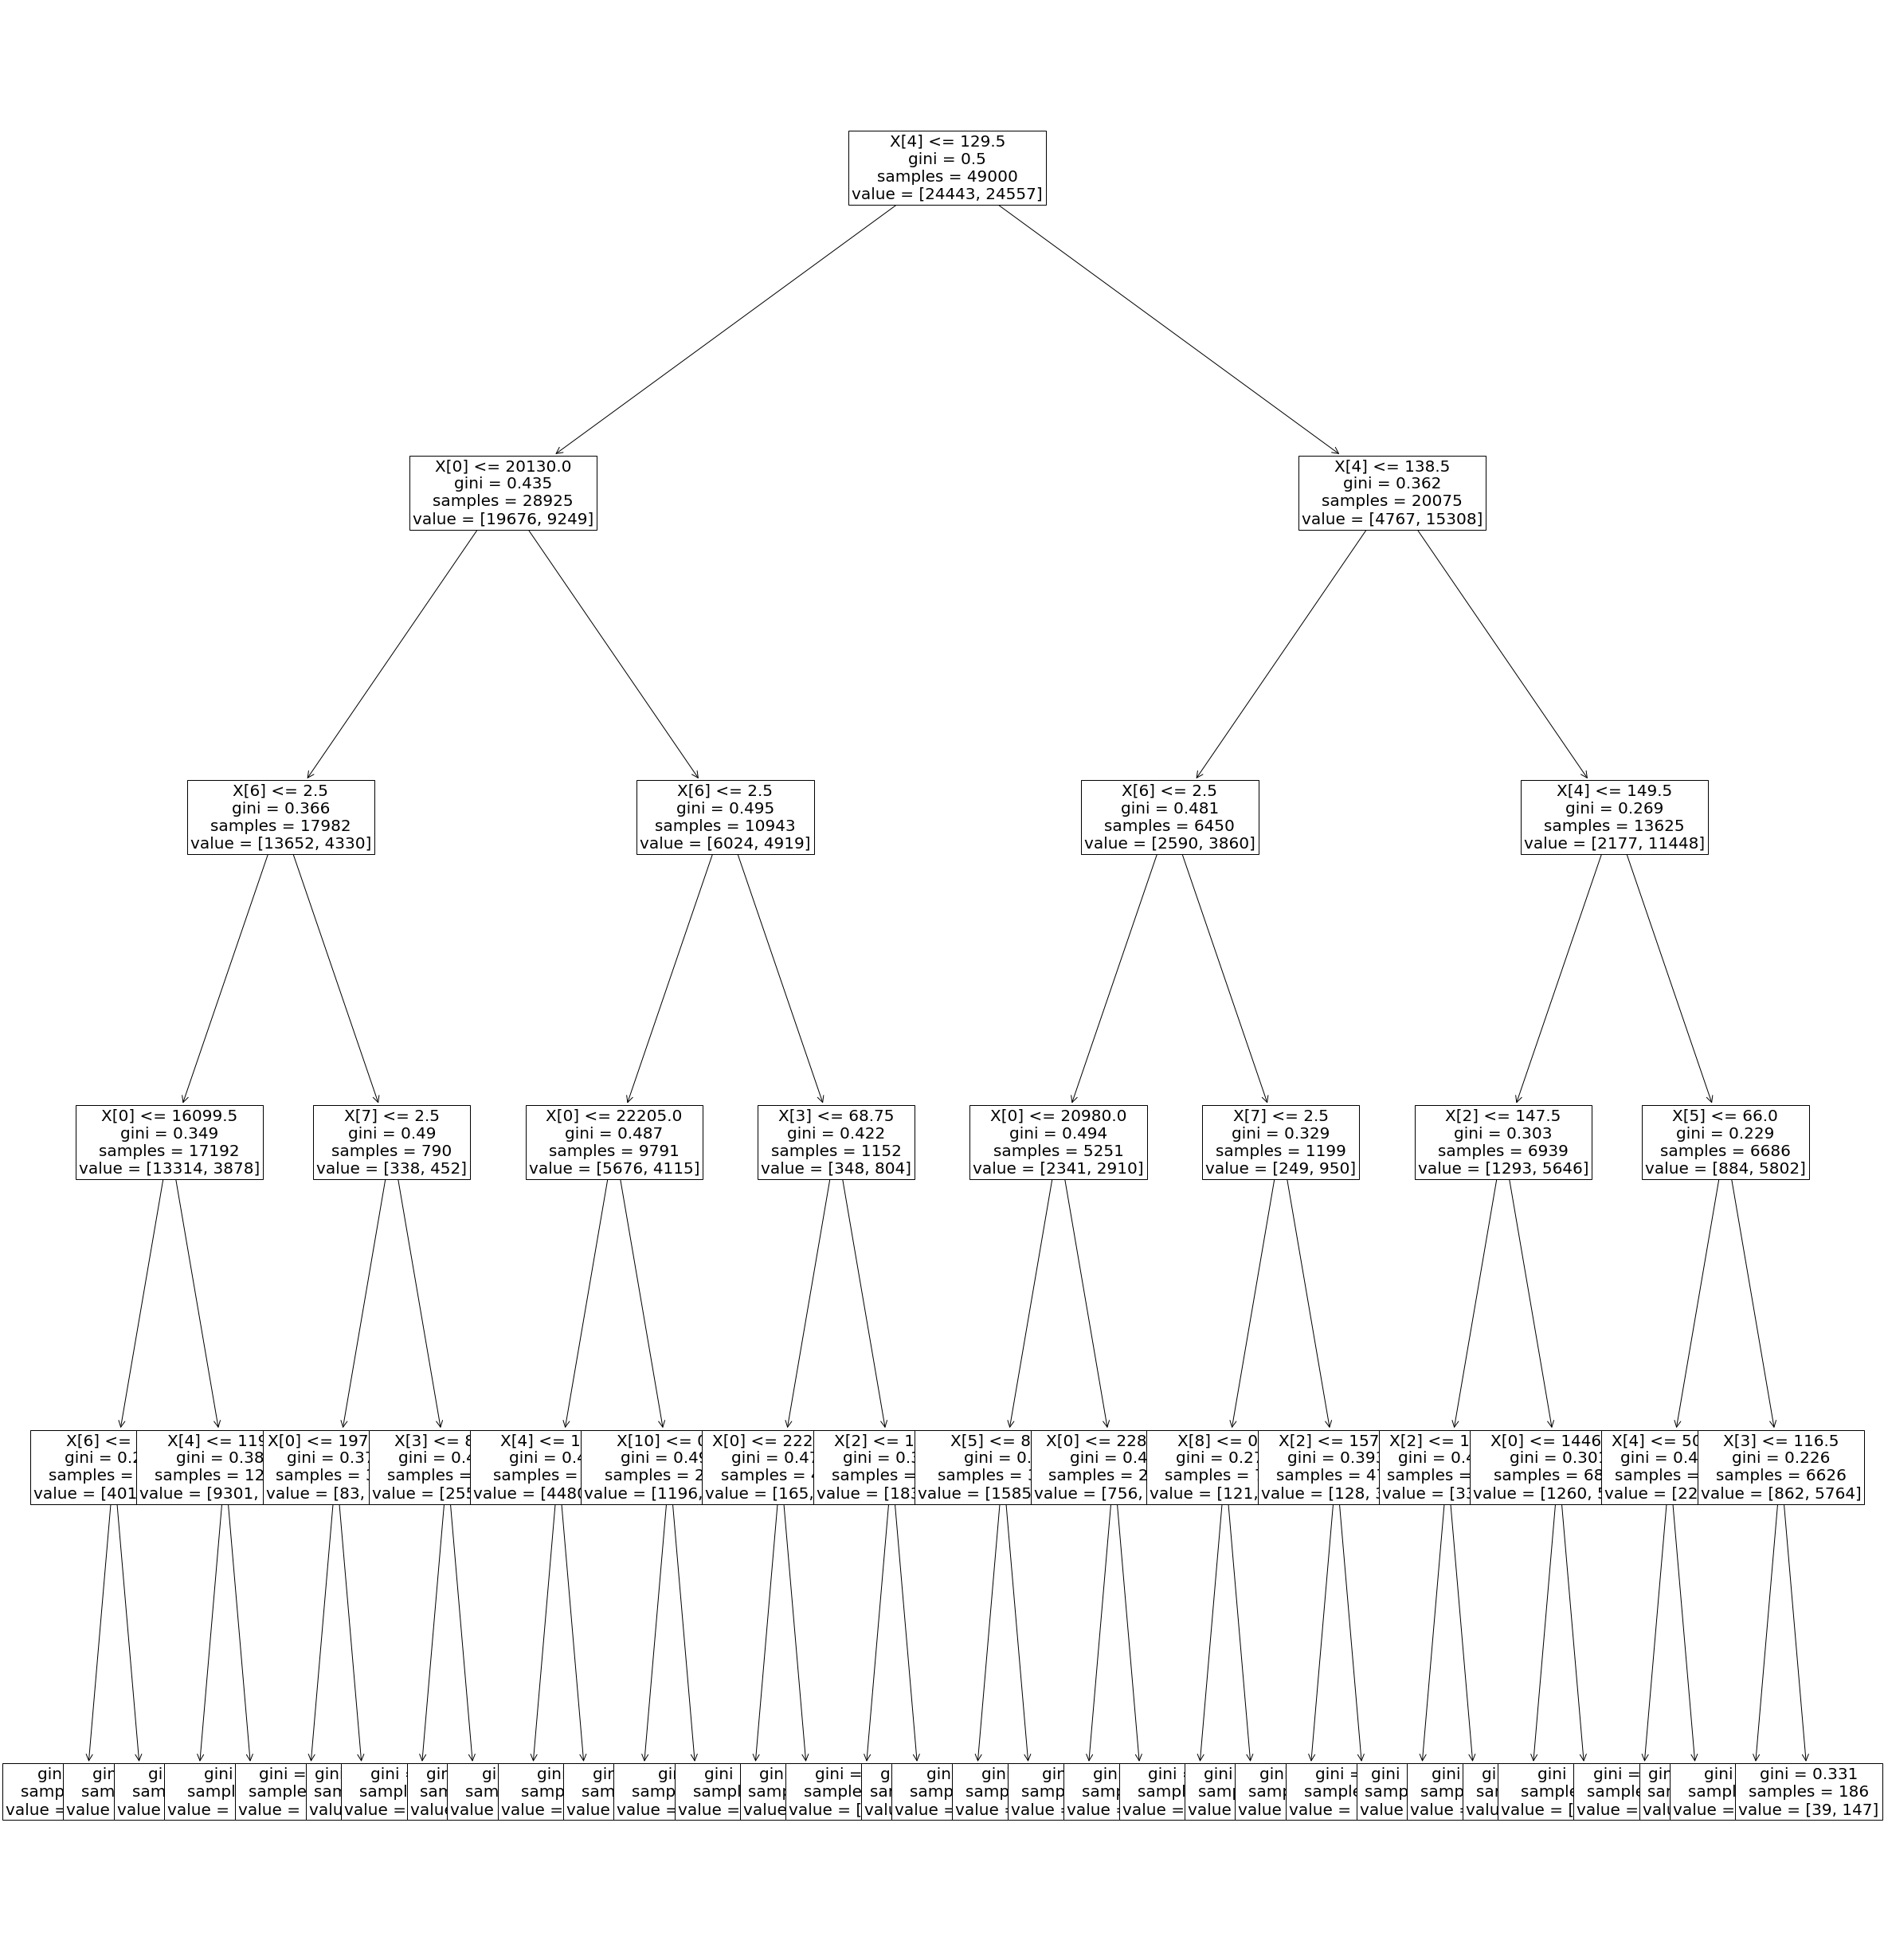

In [12]:
# Now that, we have splitted the data, we shall proceed to decision tree

#Decision tree classifier
decitree= DecisionTreeClassifier(random_state=300, min_samples_leaf=5, criterion="gini", max_depth=5)
decitree.fit(x_train, y_train)
predic=decitree.predict(x_test)

tree.plot_tree(decitree.fit(x_train,y_train), fontsize=20 )
plt.rcParams["figure.figsize"] = (35, 40)
plt.xlim(0,1000)
plt.ylim(0,40000)

In [13]:
# Accuracy tells us about how good our model works
print("Accuracy:",metrics.accuracy_score(y_test, predic))


# For the given data, the confusion matrix is given by :
print(confusion_matrix(y_test, predic))

#Classification report :
print(classification_report(y_test, predic))


Accuracy: 0.7293809523809524
[[8162 2416]
 [3267 7155]]
              precision    recall  f1-score   support

           0       0.71      0.77      0.74     10578
           1       0.75      0.69      0.72     10422

    accuracy                           0.73     21000
   macro avg       0.73      0.73      0.73     21000
weighted avg       0.73      0.73      0.73     21000



Accuracy: 0.7296190476190476
[[8158 2420]
 [3258 7164]]
              precision    recall  f1-score   support

           0       0.71      0.77      0.74     10578
           1       0.75      0.69      0.72     10422

    accuracy                           0.73     21000
   macro avg       0.73      0.73      0.73     21000
weighted avg       0.73      0.73      0.73     21000



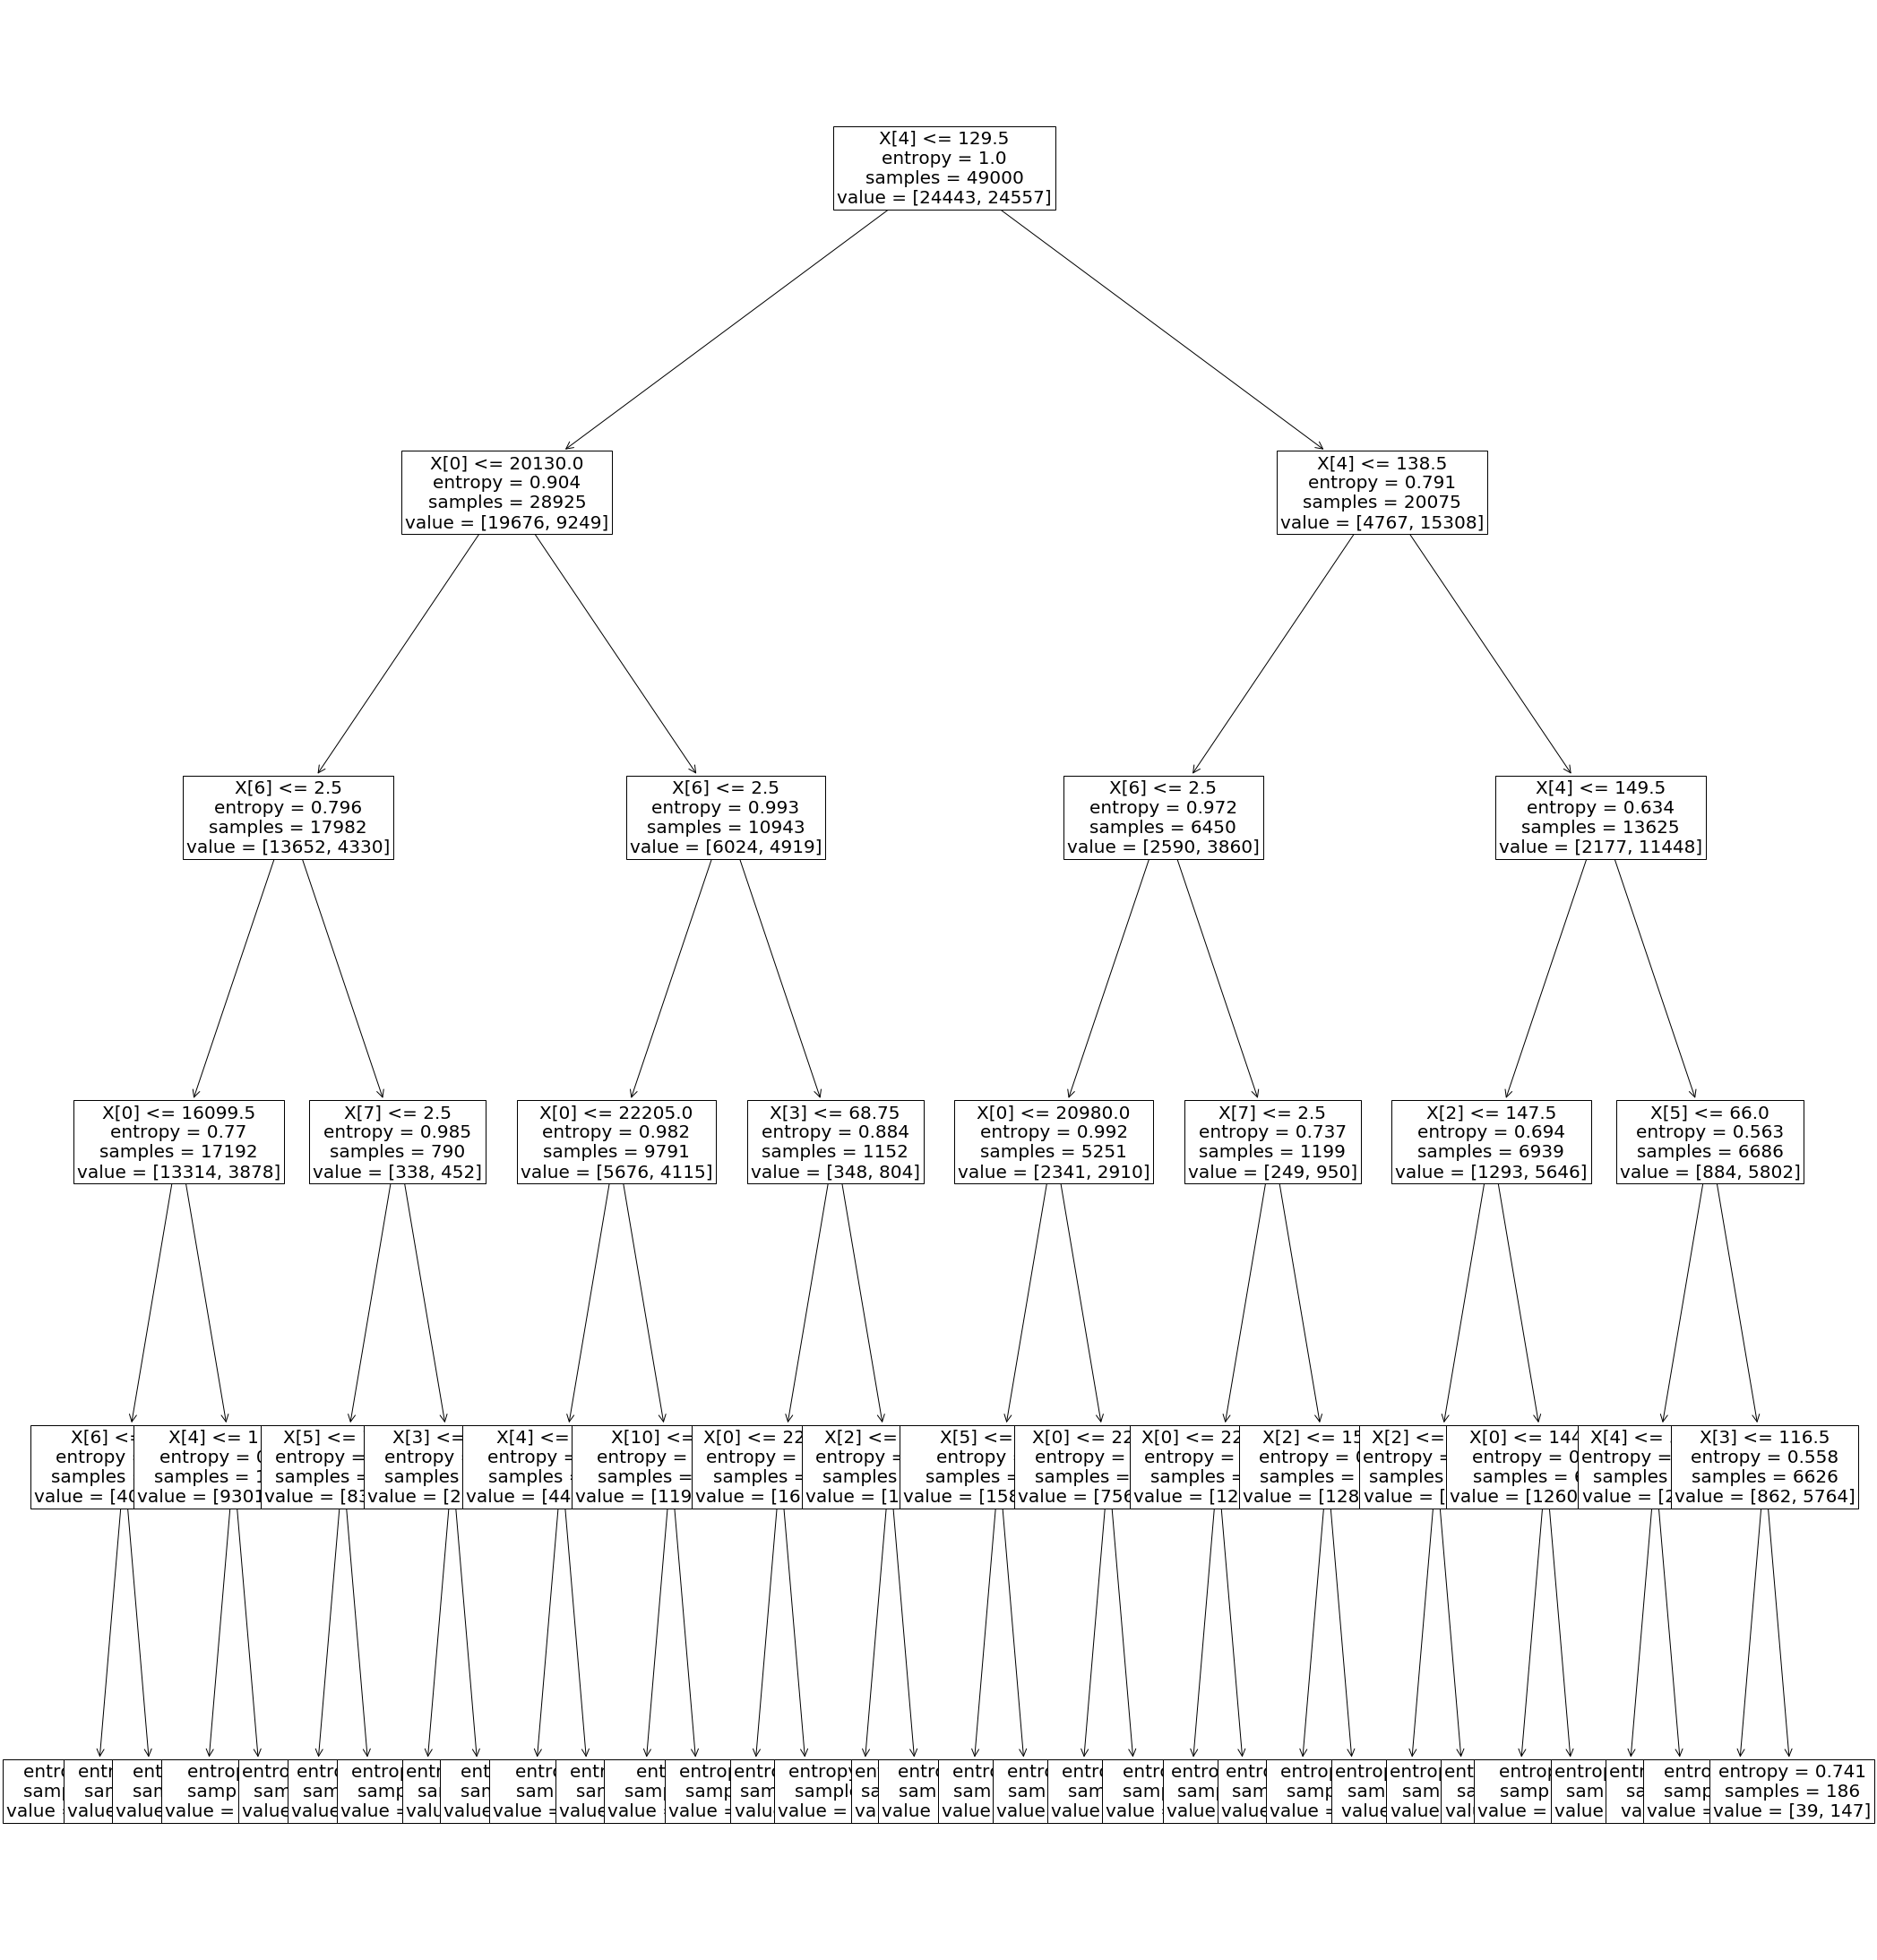

In [10]:
#Creating a decision tree classifier using entropy criteria

decitree2 = DecisionTreeClassifier(random_state=50, min_samples_leaf=5, criterion="entropy", max_depth=5)

# Training the model
decitree2 = decitree2.fit(x_train,y_train)

#Predicating for a value in given set
predic2 = decitree2.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, predic2))


tree.plot_tree(decitree2.fit(x_train,y_train),fontsize=20) 
plt.rcParams["figure.figsize"] = (40,45)
plt.xlim(0,100)
plt.ylim(0,4000)
#Confusion Matrix :
print(confusion_matrix(y_test, predic2))

#Classification report :
print(classification_report(y_test, predic2))

# Naive Base

In [11]:
#Create a Gaussian Classifier
gc = GaussianNB()

#Train the model using the training sets
gc.fit(x_train, y_train)

#Predict the response for test dataset
predicc = gc.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, predicc))

#Confusion Matrix :
print(confusion_matrix(y_test, predicc))

#Classification report :
print(classification_report(y_test, predicc))

Accuracy: 0.593047619047619
[[9770  808]
 [7738 2684]]
              precision    recall  f1-score   support

           0       0.56      0.92      0.70     10578
           1       0.77      0.26      0.39     10422

    accuracy                           0.59     21000
   macro avg       0.66      0.59      0.54     21000
weighted avg       0.66      0.59      0.54     21000

